# **Proyek Akhir : Klasifikasi Gambar**
**Nama : Charisma Juni Kumalasari**

##**Library**

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import zipfile
import os
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

##**Download Dataset Rock Paper Scissors**

In [ ]:
!wget \
=\
  -O /tmp/rockpaperscissors.zip

--2022-12-13 08:56:35--  http://=/
Resolving = (=)... failed: Name or service not known.
wget: unable to resolve host address ‘=’


## **Extrak Zip File Atau Unzip Dataset Rock Paper Scissors**

In [ ]:
#while file is a zip file, you can write this code

#lokal_zip = '/tmp/rockpaperscissors.zip'
#base_direktori = '/tmp/rockpaperscissors/rps-cv-images'
#extrak_zip = zipfile.ZipFile(lokal_zip, 'r')
#extrak_zip.extractall('/tmp')
#extrak_zip.close()

##**Atur Lokasi Dataset Rock Paper Scissors**

In [ ]:
direktori_paper = os.path.join("/tmp/rockpaperscissors/rps-cv-images/paper")
direktori_rock = os.path.join("/tmp/rockpaperscissors/rps-cv-images/rock")
direktori_scissors = os.path.join("/tmp/rockpaperscissors/rps-cv-images/scissors")

##**Mengecek Jumlah Dataset Rock Paper Scissors**

In [ ]:
total_paper = len(os.listdir(direktori_paper))
total_rock = len(os.listdir(direktori_rock))
total_scissors = len(os.listdir(direktori_scissors))

Total Gambar Paper (Kertas) diperoleh berikut :

In [ ]:
total_paper

712

Total Gambar Rock (Batu) diperoleh berikut :

In [ ]:
total_rock

726

Total Gambar Scissors (Gunting) diperoleh berikut :

In [ ]:
total_scissors

750

##**Data Pre-processing dengan Image Augmentation**

Image augmentation digunakan untuk generate versi baru dari training images pada existing dataset .
Dengan Keras, maka dapat menggunakan ImageDataGenerator function untuk membuat image augmentation.

In [ ]:
val_size = 0.4 #Ukuran validation set harus 40% dari total dataset
datagen_train = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 30,
    horizontal_flip = True,
    shear_range = 0.3,
    fill_mode = 'constant',
    validation_split = val_size
)

##**Persiapan Data untuk Model**

In [ ]:
width_image = 200  #ukuran lebar gambar
height_image = 200 #ukuran tinggi gambar
generator_train = datagen_train.flow_from_directory(
    base_direktori,
    target_size = (width_image, height_image),
    batch_size= 32,
    color_mode = "rgb",
    class_mode = 'categorical',
    subset = 'training'
)

Found 1314 images belonging to 3 classes.


In [ ]:
datagen_validation = ImageDataGenerator(rescale=1./255)

generator_validation = datagen_train.flow_from_directory(
    base_direktori,
    target_size = (width_image, height_image),
    batch_size= 32,
    class_mode = 'categorical',
    subset = 'validation'
)

Found 874 images belonging to 3 classes.


Terlihat bahwa terdapat 1314 gambar untuk training dan 874 gambar untuk validasi.

##**Pendefinisian CNN Model**

Model untuk klasifikasi gambar dengan membuat arsitektur 2D CNN.

Pembuatan Model dengan tipe Sequential

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (200, 200, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(256, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation = 'relu'), # Activation menggunakan relu + softmax
    tf.keras.layers.Dense(3, activation = 'softmax')
])

##**Compiling model dengan optimizer, loss function dan metri**c

In [ ]:
adam_optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(
    loss = 'categorical_crossentropy',
    optimizer = adam_optimizer,
    metrics = ['accuracy']               
)

##**Model Summary**

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 198, 198, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 99, 99, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 97, 97, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 48, 48, 64)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 46, 46, 128)       73856     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 23, 23, 128)     

Berdasarkan model summary terlihat bahwa model mempunyai total parameters dan trainable parameters adalah 13,497,667

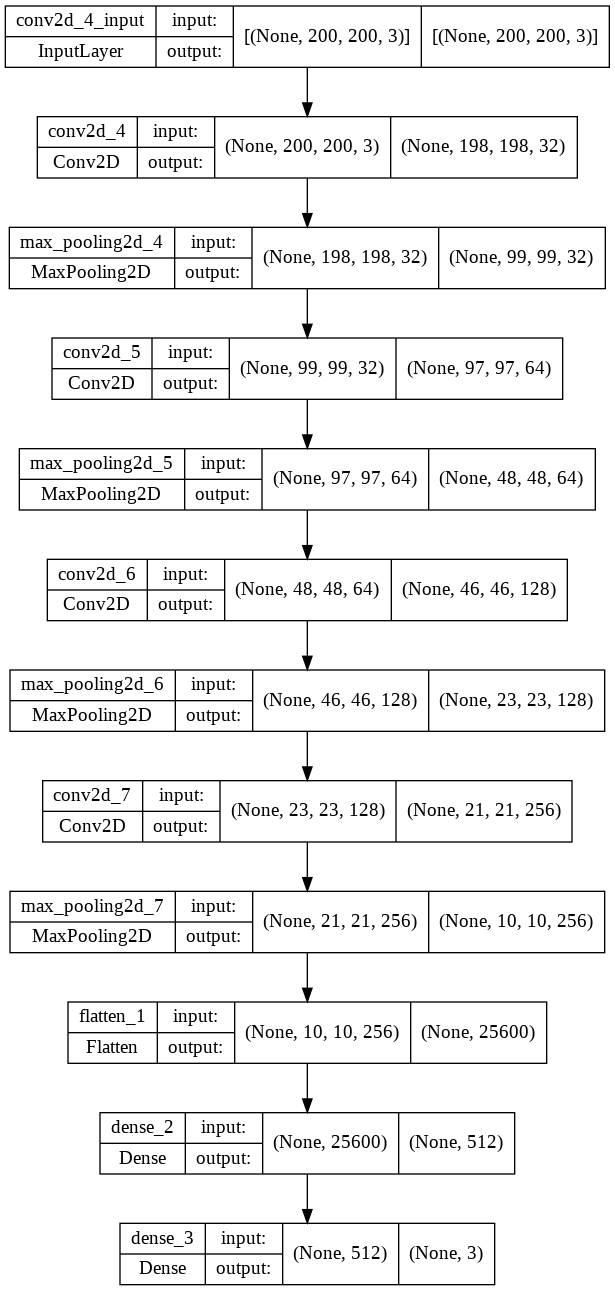

In [ ]:
tf.keras.utils.plot_model(
    model,
    show_shapes=True,
    show_layer_names=True,
)

##**Callbacks**

**Callbacks Function** untuk kecepatan training yang lebih cepat, mencegah *overfitting* dan menghentikan training setelah akurasi terpenuhi.

In [ ]:
threshold_accuracy = 96e-2
class Callbacks(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs = {}):
        if logs.get('accuracy') >= threshold_accuracy:
            print('\nUntuk Epoch', epoch, '\nAccuracy telah mencapai = %2.2f%%' %(logs['accuracy']*100), 'training telah di stop.')
            self.model.stop_training = True

##**Training data (Model Fitting)**

In [ ]:
history = model.fit(
    generator_train,
    steps_per_epoch = 25, # batch yang akan di eksekusi pada setiap epoch
    epochs = 30, # tambahkan epoch jika akurasinya belum optimal
    validation_data = generator_validation, # untuk menampilkan akurasi pengujian data validasi
    validation_steps = 5,
    verbose = 1,
    callbacks = [Callbacks()]
)

Epoch 1/30
25/25 [==============================] - 70s 3s/step - loss: 1.2277 - accuracy: 0.3260 - val_loss: 1.0954 - val_accuracy: 0.4625
Epoch 2/30
25/25 [==============================] - 69s 3s/step - loss: 1.0357 - accuracy: 0.5000 - val_loss: 0.8973 - val_accuracy: 0.5188
Epoch 3/30
25/25 [==============================] - 68s 3s/step - loss: 0.7868 - accuracy: 0.6545 - val_loss: 0.5415 - val_accuracy: 0.8250
Epoch 4/30
25/25 [==============================] - 68s 3s/step - loss: 0.4414 - accuracy: 0.8286 - val_loss: 0.5657 - val_accuracy: 0.7250
Epoch 5/30
25/25 [==============================] - 71s 3s/step - loss: 0.3551 - accuracy: 0.8612 - val_loss: 0.3473 - val_accuracy: 0.8562
Epoch 6/30
25/25 [==============================] - 68s 3s/step - loss: 0.2886 - accuracy: 0.8922 - val_loss: 0.2739 - val_accuracy: 0.9000
Epoch 7/30
25/25 [==============================] - 68s 3s/step - loss: 0.2500 - accuracy: 0.9052 - val_loss: 0.2080 - val_accuracy: 0.9187
Epoch 8/30
25/25 [==

##**Plot Akurasi dan Loss**

In [ ]:
training_accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']
training_loss = history.history['loss']
validation_loss = history.history['val_loss']

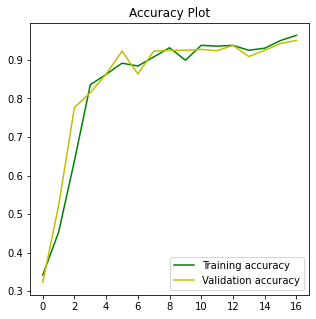

<Figure size 432x288 with 0 Axes>

In [ ]:
epochs = range(len(training_accuracy))

plt.figure(figsize=(5,5))

plt.plot(epochs, training_accuracy, 'g', label='Training accuracy')
plt.plot(epochs, validation_accuracy, 'y', label='Validation accuracy')
plt.title('Accuracy Plot')
plt.legend(loc=0)
plt.figure()


plt.show()

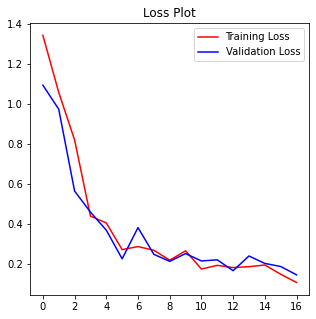

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.figure(figsize=(5,5))

plt.plot(epochs, training_loss, 'r', label='Training Loss')
plt.plot(epochs, validation_loss, 'b', label='Validation Loss')
plt.title('Loss Plot')
plt.legend(loc=0)
plt.figure()

plt.show()

##**Fungsi Prediksi Hasil Model gambar Rock Paper Scissors**

Saving 0ePX1wuCc3et7leL.png to 0ePX1wuCc3et7leL.png


Hasil Prediksi Gambar :  [0. 0. 1.] 

Gambar tersebut adalah  Scissors (Gunting) 



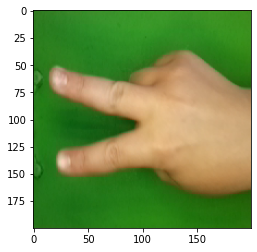

In [ ]:
uploaded_file = files.upload() # upload file

for upload_file in uploaded_file.keys():
  # prediksi gambar
  path = upload_file
  img_source = image.load_img(path, target_size = (200, 200))
  imgplot = plt.imshow(img_source)
  x = image.img_to_array(img_source)
  x = np.expand_dims(x, axis = 0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size = 10)

  print("\n")
  print('Hasil Prediksi Gambar : ',classes[0],'\n')

  if classes[0, 0] == 1:
    print('Gambar tersebut adalah Paper (Kertas) \n')
  elif classes[0, 1] == 1:
    print('Gambar tersebut adalah  Rock (Batu) \n ')
  elif classes[0, 2] == 1:
    print('Gambar tersebut adalah  Scissors (Gunting) \n')
  else:
    print('Tidak Diketahui')